# Convolutional Neural Network - MNIST Classification


### Import Libs

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import backend as K

tf.logging.set_verbosity(tf.logging.ERROR)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


### Define one hot encode function

In [2]:
def one_hot_encode(x, num_classes):
    one_hot = np.zeros([len(x), num_classes])
    for i in enumerate(x):
        one_hot[(i[0], i[1])] = 1
    return one_hot

### Read Data

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Text(0.5, 1.0, '2')

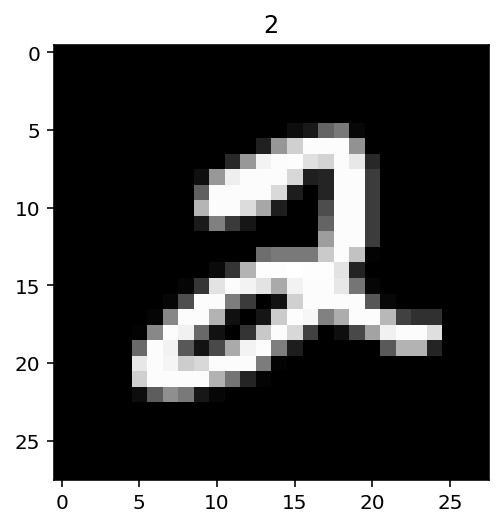

In [4]:
plt.imshow(train_X[5], cmap=plt.get_cmap('gray'))
plt.title(train_y[5])

### Normalize data

In [5]:
train_X = train_X.astype(np.float32)
train_X /= 255.0

test_X = test_X.astype(np.float32)
test_X /= 255.0

### Encode outputs

In [6]:
train_y = one_hot_encode(train_y, 10)
test_y = one_hot_encode(test_y, 10)

### Parameters

In [7]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28
train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

### Build Model

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### Train

In [10]:
checkpoint = ModelCheckpoint('model/cnn-mnist-model-{epoch:03d}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history = model.fit(train_X, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_X, test_y),
          callbacks = [checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 797us/step - loss: 0.2100 - acc: 0.9354 - val_loss: 0.0502 - val_acc: 0.9831
Epoch 2/10
60000/60000 [==============================] - 47s 789us/step - loss: 0.0588 - acc: 0.9825 - val_loss: 0.0417 - val_acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.0396 - acc: 0.9879 - val_loss: 0.0359 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.0313 - acc: 0.9904 - val_loss: 0.0262 - val_acc: 0.9909
Epoch 5/10
60000/60000 [==============================] - 48s 792us/step - loss: 0.0252 - acc: 0.9922 - val_loss: 0.0299 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 46s 759us/step - loss: 0.0209 - acc: 0.9934 - val_loss: 0.0358 - val_acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 47s 786us/step - loss: 0.0171 - acc: 0.9941 - val_loss: 0.

### Results

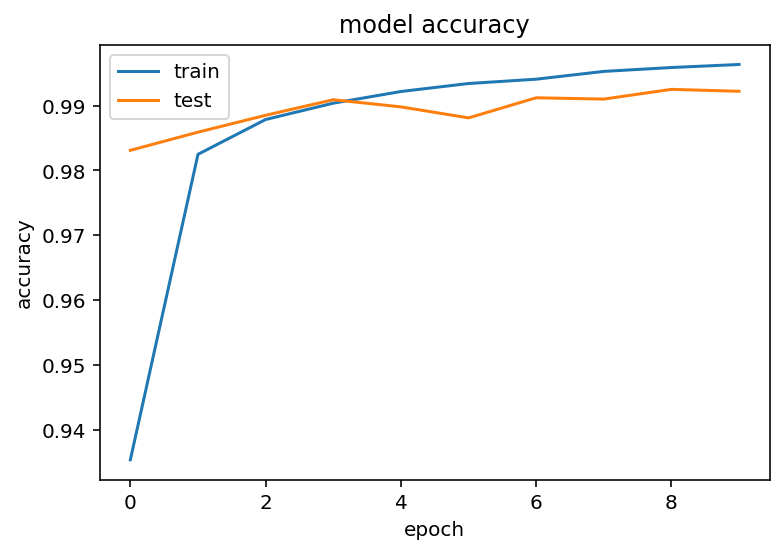

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Load best model before overfitting

In [12]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02635958956483164
Test accuracy: 0.9922
